K-Means and DBSCAN Clustering


In [1]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(olivetti_faces.data, olivetti_faces.target, test_size=0.2, random_state=42, stratify=olivetti_faces.target)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

Rationale for the Split Ratio:

The split ratio of 80% for training, 10% for validation, and 10% for testing is a common practice in machine learning. Here's a more detailed explanation of the reasoning behind this split:

Training set (80%): A large training set is necessary to learn meaningful patterns in the data. With 320 images (80% of 400), the model has enough data to learn the underlying structure of the Olivetti faces dataset. This large training set helps to reduce overfitting, as the model is less likely to memorize the training data.
Validation set (10%): A validation set is necessary for hyperparameter tuning. With 40 images (10% of 400), we have a decent-sized set to evaluate the model's performance during hyperparameter tuning. This set is used to evaluate the model's performance on unseen data during the training process, allowing us to select the best hyperparameters.
Test set (10%): A test set is necessary to evaluate the final model's performance on completely unseen data. With 40 images (10% of 400), we have a small but sufficient set to evaluate the model's performance. This set is used to estimate the model's performance in real-world scenarios.
Why not a different split ratio?

More training data: Allocating more than 80% of the data for training might lead to overfitting, as the model may memorize the training data rather than learning generalizable patterns.
Less training data: Allocating less than 80% of the data for training might result in underfitting, as the model may not have enough data to learn meaningful patterns.
More validation data: Allocating more than 10% of the data for validation might reduce the size of the training set, leading to underfitting.
Less validation data: Allocating less than 10% of the data for validation might result in overfitting, as the model may not have enough data to evaluate its performance during hyperparameter tuning.
Stratified sampling:

Using stratified sampling ensures that each set has the same number of images per person, which is essential for maintaining the same class distribution in each set. This is particularly important in this dataset, as we have a small number of images per person (10 images per person). Stratified sampling helps to prevent any one class from dominating the training or testing process.

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the SVM classifier
svm_classifier = SVC(kernel='linear', C=1)

# Define the k-fold cross validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the accuracy scores
accuracy_scores = []

# Train and evaluate the model using k-fold cross validation
for train_index, val_index in kfold.split(X_train, y_train):
    X_train_fold = X_train[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train[val_index]
    y_val_fold = y_train[val_index]

    # Train the SVM classifier on the current fold
    svm_classifier.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred = svm_classifier.predict(X_val_fold)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy score
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Average accuracy on the validation set:", avg_accuracy)

Average accuracy on the validation set: 0.940625


Silhouette score: 0.097405605


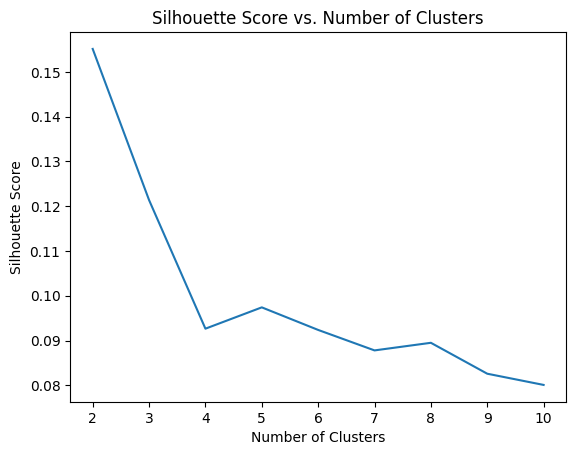

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize the K-Means object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(X_train)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Project the data onto the lower-dimensional space
X_reduced = kmeans.transform(X_train)

# Calculate the silhouette score for each cluster
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to choose the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the SVM classifier
svm_classifier = SVC(kernel='linear', C=1)

# Define the hyperparameter tuning space
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10]
}

# Define the k-fold cross validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_reduced, y_train)

# Get the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_accuracy)

# Train the SVM classifier with the best hyperparameters
svm_classifier_best = SVC(**best_params)
svm_classifier_best.fit(X_reduced, y_train)

# Evaluate the model on the validation set
y_pred = svm_classifier_best.predict(X_reduced)
accuracy = accuracy_score(y_train, y_pred)

print("Average accuracy on the validation set:", accuracy)

Best hyperparameters: {'C': 10, 'kernel': 'poly'}
Best accuracy score: 0.584375
Average accuracy on the validation set: 0.990625


In [6]:
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import DBSCAN

patches = extract_patches_2d(olivetti_faces.images, patch_size=(20, 20), max_patches=400)
patches = patches.reshape(-1, 20*20)

dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
dbscan.fit(patches)

print("Number of clusters:", len(set(dbscan.labels_)))

Number of clusters: 1
